First let's try to extract json into csv

I am first trying to do this with only 2017 data, so i will take a flight data for 2017, and weather data for 2017.

In [1]:
import json
import csv
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
json_file = "2017-1.json"
output_csv = "output.csv"

Let's try to define a function to get json data

In [4]:
def json_to_csv(json_file, csv_file):
    with open(json_file, 'r') as json_loader:
        data = json.load(json_loader)
    with open(csv_file, 'w', newline='') as csv_writer:
        writer = csv.writer(csv_writer)
        writer.writerow(["Date", "Time", "Temperature(C)", "Temperature(F)", "FeelsLike(C)", "FeelsLike(F)", "DewPoint(C)", "DewPoint(F)", 
                         "Humidity", "WindSpeed(Kmph)", "WindSpeed(Miles)", "WindGust(Kmph)", "WindGust(Miles)", "WindDirection(Degree)", 
                         "WindDirection(16Point)", "WindChill(C)", "WindChill(F)", "HeatIndex(C)", "HeatIndex(F)", "Pressure", 
                         "Precipitation(mm)", "CloudCover", "Visibility", "WeatherCode", "WeatherDescription", "WeatherIconUrl"])

        for idx in range(len(data['data']['weather'])):
            for hour in data['data']['weather'][idx]['hourly']:
                writer.writerow([
                    data['data']['weather'][idx]['date'],
                    hour['time'],
                    hour['tempC'],
                    hour['tempF'],
                    hour['FeelsLikeC'],
                    hour['FeelsLikeF'],
                    hour['DewPointC'],
                    hour['DewPointF'],
                    hour['humidity'],
                    hour['windspeedKmph'],
                    hour['windspeedMiles'],
                    hour['WindGustKmph'],
                    hour['WindGustMiles'],
                    hour['winddirDegree'],
                    hour['winddir16Point'],
                    hour['WindChillC'],
                    hour['WindChillF'],
                    hour['HeatIndexC'],
                    hour['HeatIndexF'],
                    hour['pressure'],
                    hour['precipMM'],
                    hour['cloudcover'],
                    hour['visibility'],
                    hour['weatherCode'],
                    hour['weatherDesc'][0]['value'],
                    hour['weatherIconUrl'][0]['value']
                ])


In [5]:
json_to_csv(json_file, output_csv)

In [6]:
import pandas as pd

In [7]:
output_csv = pd.read_csv('output.csv')

Check if the above function worked or not

In [8]:
output_csv.head()

,Date,Time,Temperature(C),Temperature(F),FeelsLike(C),FeelsLike(F),DewPoint(C),DewPoint(F),Humidity,WindSpeed(Kmph),...,WindChill(F),HeatIndex(C),HeatIndex(F),Pressure,Precipitation(mm),CloudCover,Visibility,WeatherCode,WeatherDescription,WeatherIconUrl
0,2017-01-01,0,6,43,3,38,4,38,83,15,...,38,6,43,1020,0.3,100,2,266,Light drizzle,http://cdn.worldweatheronline.net/images/wsymb...
1,2017-01-01,100,6,44,4,38,4,39,85,15,...,38,6,44,1020,0.3,100,3,266,Light drizzle,http://cdn.worldweatheronline.net/images/wsymb...
2,2017-01-01,200,7,44,4,39,5,40,87,14,...,39,7,44,1020,0.3,100,4,353,Light rain shower,http://cdn.worldweatheronline.net/images/wsymb...
3,2017-01-01,300,7,44,4,39,5,41,89,14,...,39,7,44,1019,0.3,100,5,353,Light rain shower,http://cdn.worldweatheronline.net/images/wsymb...
4,2017-01-01,400,7,45,5,40,6,42,91,13,...,40,7,45,1019,0.7,100,6,353,Light rain shower,http://cdn.worldweatheronline.net/images/wsymb...


In [9]:
import seaborn as sns

Let's try to visualize some of the values and try to find out some pattern if we can

<Axes: ylabel='Temperature(C)'>

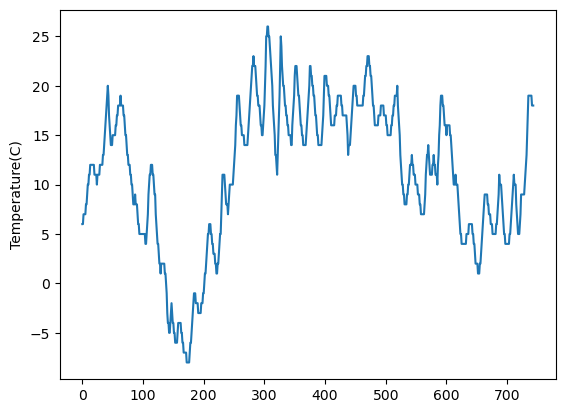

In [10]:
sns.lineplot(output_csv['Temperature(C)'])

In [11]:
numeric_columns = output_csv.select_dtypes(include=['int', 'float']).columns

In [12]:
import matplotlib.pyplot as plt

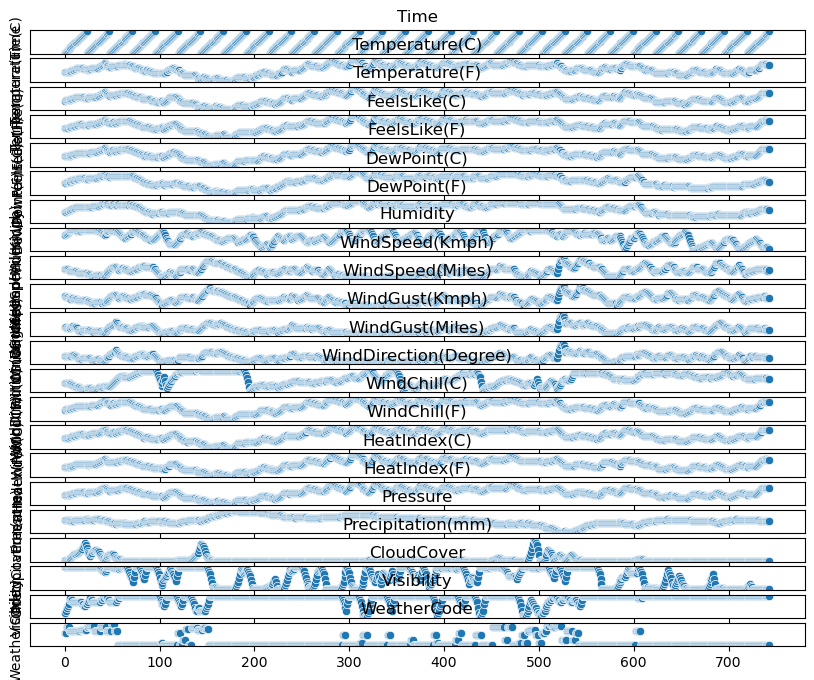

In [13]:
fig, axs = plt.subplots(nrows=len(numeric_columns), figsize=(10, 8))
for i, column in enumerate(numeric_columns):
    sns.scatterplot(output_csv[column], ax=axs[i], cmap='coolwarm')
    axs[i].set_title(column)
    axs[i].set_yticks([])  # Hide y-axis ticks for cleaner visualization

plt.tight_layout()
plt.show()

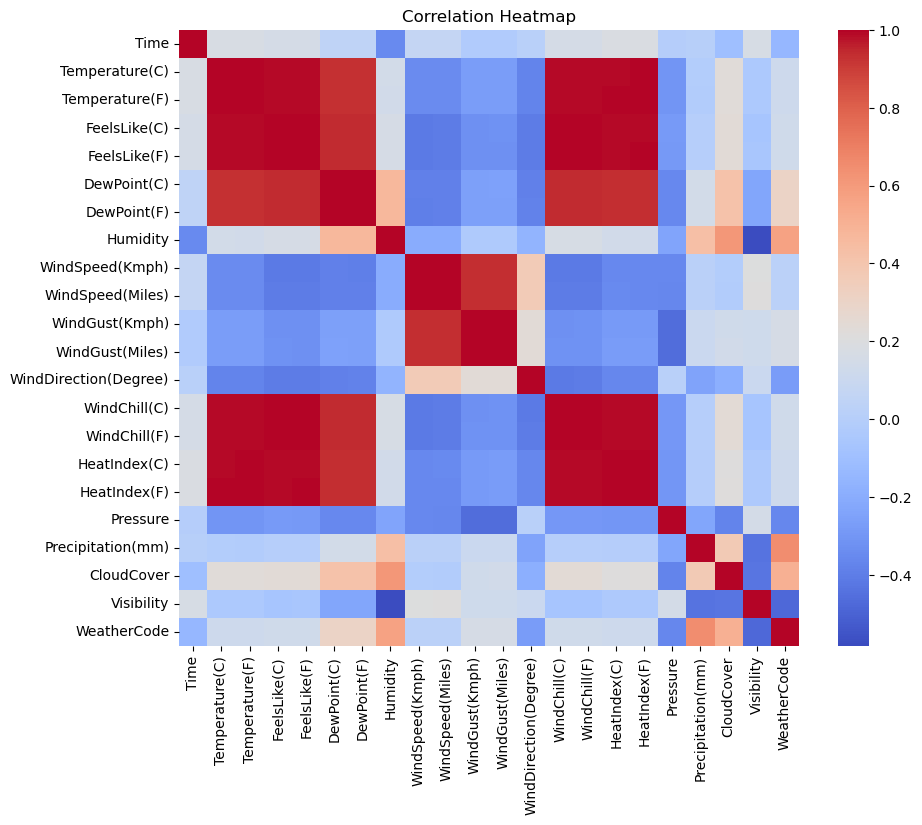

In [14]:
numeric_data = output_csv.select_dtypes(include=['int', 'float'])
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

*Correlated variables are in bold*
We can see that there is a high correlation between **heat index and wind chill** (which seems obvious), then there is a correlation between **pressure and visibility** which can be helpful. **Humidity and cloud cover** have some correlation. **Humidity and precipitation** have a correlation.

In [15]:
flight_data = pd.read_csv('On_Time_On_Time_Performance_2017_1.csv')

In [16]:
flight_data.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,UniqueCarrier,AirlineID,Carrier,TailNum,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2017,1,1,17,2,2017-01-17,AA,19805,AA,N583AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017,1,1,18,3,2017-01-18,AA,19805,AA,N544AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017,1,1,19,4,2017-01-19,AA,19805,AA,N553AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017,1,1,20,5,2017-01-20,AA,19805,AA,N191AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017,1,1,21,6,2017-01-21,AA,19805,AA,N170AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450017 entries, 0 to 450016
Columns: 110 entries, Year to Unnamed: 109
dtypes: float64(70), int64(21), object(19)
memory usage: 377.7+ MB


In [18]:
flight_data.describe()

,Year,Quarter,Month,DayofMonth,DayOfWeek,AirlineID,FlightNum,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
count,450017.0,450017.0,450017.0,450017.000000,450017.000000,450017.000000,450017.000000,450017.000000,4.500170e+05,450017.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2017.0,1.0,1.0,15.943455,3.840848,19900.483275,2079.643193,12698.267568,1.269830e+06,31738.603264,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.0,0.0,0.0,8.971734,2.063823,385.381448,1722.700045,1534.326936,1.534324e+05,1286.063689,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2017.0,1.0,1.0,1.000000,1.000000,19393.000000,1.000000,10135.000000,1.013503e+06,30070.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2017.0,1.0,1.0,8.000000,2.000000,19690.000000,679.000000,11292.000000,1.129202e+06,30647.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2017.0,1.0,1.0,16.000000,4.000000,19805.000000,1602.000000,12892.000000,1.289204e+06,31454.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2017.0,1.0,1.0,24.000000,6.000000,20304.000000,3034.000000,14057.000000,1.405702e+06,32467.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2017.0,1.0,1.0,31.000000,7.000000,21171.000000,7439.000000,16218.000000,1.621801e+06,35991.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
pd.set_option('display.max_rows', None)

In [20]:
flight_data.isna().sum()

Year                         0
Quarter                      0
Month                        0
DayofMonth                   0
DayOfWeek                    0
FlightDate                   0
UniqueCarrier                0
AirlineID                    0
Carrier                      0
TailNum                    639
FlightNum                    0
OriginAirportID              0
OriginAirportSeqID           0
OriginCityMarketID           0
Origin                       0
OriginCityName               0
OriginState                  0
OriginStateFips              0
OriginStateName              0
OriginWac                    0
DestAirportID                0
DestAirportSeqID             0
DestCityMarketID             0
Dest                         0
DestCityName                 0
DestState                    0
DestStateFips                0
DestStateName                0
DestWac                      0
CRSDepTime                   0
DepTime                   8541
DepDelay                  8541
DepDelay

In [21]:
output_csv.isna().sum()

Date                      0
Time                      0
Temperature(C)            0
Temperature(F)            0
FeelsLike(C)              0
FeelsLike(F)              0
DewPoint(C)               0
DewPoint(F)               0
Humidity                  0
WindSpeed(Kmph)           0
WindSpeed(Miles)          0
WindGust(Kmph)            0
WindGust(Miles)           0
WindDirection(Degree)     0
WindDirection(16Point)    0
WindChill(C)              0
WindChill(F)              0
HeatIndex(C)              0
HeatIndex(F)              0
Pressure                  0
Precipitation(mm)         0
CloudCover                0
Visibility                0
WeatherCode               0
WeatherDescription        0
WeatherIconUrl            0
dtype: int64

Since the weather data is only for ATL that we have loaded, we can first try and do it for ATL then we can repeat the same thing for all other airports.

In [22]:
flight_data = flight_data.dropna(axis=1, how='all')

In [23]:
columns_to_keep = ['FlightDate', 'Quarter', 'Year', 'Month', 'DayofMonth', 'DepTime', 'DepDel15', 'CRSDepTime', 'DepDelayMinutes',
                 'Origin', 'Dest', 'ArrTime', 'CRSArrTime', 'ArrDel15', 'ArrDelayMinutes']

In [24]:
flight_data = flight_data[columns_to_keep]

Filtering data for only ATL and for the specific date from weather table

In [30]:
flight_data_filtered_1 = flight_data[(flight_data['Origin'] == 'ATL') | (flight_data['Dest'] == 'ATL')]
flight_data_filtered_1 = flight_data_filtered_1.rename(columns={'FlightDate':'Date'})
final_filter = output_csv[output_csv['Date'].isin(flight_data_filtered_1['Date'])]

Merging tables

In [31]:
merged_csv = pd.merge(flight_data_filtered_1, final_filter, on='Date', how='inner')

In [33]:
merged_csv.to_csv('merged.csv', index=False)

In [34]:
merged_csv = pd.read_csv('merged.csv')
merged_csv.head()

,Date,Quarter,Year,Month,DayofMonth,DepTime,DepDel15,CRSDepTime,DepDelayMinutes,Origin,...,WindChill(F),HeatIndex(C),HeatIndex(F),Pressure,Precipitation(mm),CloudCover,Visibility,WeatherCode,WeatherDescription,WeatherIconUrl
0,2017-01-01,1,2017,1,1,1124.0,0.0,1130,0.0,ATL,...,38,6,43,1020,0.3,100,2,266,Light drizzle,http://cdn.worldweatheronline.net/images/wsymb...
1,2017-01-01,1,2017,1,1,1124.0,0.0,1130,0.0,ATL,...,38,6,44,1020,0.3,100,3,266,Light drizzle,http://cdn.worldweatheronline.net/images/wsymb...
2,2017-01-01,1,2017,1,1,1124.0,0.0,1130,0.0,ATL,...,39,7,44,1020,0.3,100,4,353,Light rain shower,http://cdn.worldweatheronline.net/images/wsymb...
3,2017-01-01,1,2017,1,1,1124.0,0.0,1130,0.0,ATL,...,39,7,44,1019,0.3,100,5,353,Light rain shower,http://cdn.worldweatheronline.net/images/wsymb...
4,2017-01-01,1,2017,1,1,1124.0,0.0,1130,0.0,ATL,...,40,7,45,1019,0.7,100,6,353,Light rain shower,http://cdn.worldweatheronline.net/images/wsymb...


In [68]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import numpy as np

Initializing simple models with default parameters

In [38]:
model1 = RandomForestClassifier()
model2 = XGBClassifier()

Splitting data into train and test

In [74]:
merged_dtypes_filtered = merged_csv.select_dtypes(include=['int', 'float'])

In [76]:
x, y = merged_dtypes_filtered.drop(columns=['ArrDel15']), merged_dtypes_filtered['ArrDel15']

Cleaning NaN values

In [98]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [84]:
x_imputer = SimpleImputer(strategy='mean')
y_imputer = SimpleImputer(strategy='most_frequent')

In [85]:
xtrain_clean_data = x_imputer.fit_transform(xtrain)

In [91]:
xtest_clean_data = x_imputer.fit_transform(xtest)

In [86]:
ytrain_clean_data = y_imputer.fit_transform(np.array(ytrain).reshape(-1,1))

In [99]:
ytest_clean_data = y_imputer.fit_transform(np.array(ytest).reshape(-1, 1))

In [87]:
ytrain_clean_data

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [1.],
       [0.]])

In [89]:
model1.fit(xtrain_clean_data, ytrain_clean_data)

RandomForestClassifier()

In [90]:
model2.fit(xtrain_clean_data, ytrain_clean_data)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [93]:
model1_pred = model1.predict(np.array(xtest_clean_data))
model2_pred = model2.predict(np.array(xtest_clean_data))

In [94]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [100]:
cnf_mtrx_1 = confusion_matrix(model1_pred, ytest_clean_data)
cnf_mtrx_2 = confusion_matrix(model2_pred, ytest_clean_data)

In [101]:
cnf_mtrx_1.plot()
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

In [ ]:
cnf_mtrx_2.plot()
plt.show()

In [1]:
import os
os.getcwd()

'C:\\Users\\prana\\petavue\\petavue_assignment'